(more-lab)=
# More layers

In [3]:
import numpy as np               # numeric
import matplotlib.pyplot as plt  # plotting
import matplotlib as mpl         # plotting

# showing imported graphics
from IPython.display import display, Image

import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

Invoking __init__.py for neural


## Two layers of neurons

In the previous chapter we have seen that the MCP neuron with the step activation function realizes the inequality $x \cdot w=w_0+x_1 w_1 + \dots x_n w_n > 0$, where $n$ in the dimensionality of the input space. It is instructive to follow up this geometric interpretation. Taking for definiteness $n=2$ (the plane), the above inequality corresponds to a division into two half-planes. As we already know, the line given by the equation

$$x \cdot w=w_0+x_1 w_1 + \dots x_n w_n = 0$$

is the **dividing line**.


Imagine now that we have more such conditions: two, three, etc., in general $k$ independent conditions. Taking a conjunction of these conditions we can build regions as shown, e.g., in {numref}`regions-fig`.

:::{figure-md} regions-fig
<img src="images/regions.png" width="620px"> 

Sample convex regions in the plane obtained, from left to right, with one inequality condition, and a conjunctions of 2, 3, or 4 inequality conditions, yielding **polygons**.
:::

```{admonition} Convex region

By definition, region $A$ is convex if and only if a straight line between any two points in $A$ is contained in $A$. A region which is not convex is called **concave**.
```

Clearly, $k$ inequality conditions can be imposed with $k$ MCP neurons. 
Recall from section {ref}`bool-sec` that we can straightforwardly build boolean functions with the help of the neural networks. In particular, we can make a conjunction of $k$ conditions by taking a neuron with the weights $w_0=-1$ and $1/k < w_i < 1/(k-1)$, where $i=1,\dots,k$. One possibility is, e.g., 

$$w_i=\frac{1}{k-\frac{1}{2}}.$$

Indeed, let $p_0=0$, and the conditions imposed by the inequalities be denoted as $p_i$, $i=1,\dots,k$, which may take values 1 or 0 (true or false). Then 

$$p \cdot w =-1 + p_1 w_1 + \dots + p_k w_k = -1+\frac{p_1+\dots p_k}{k-\frac{1}{2}} > 0$$ 

if and only if all $p_i=1$, i.e. all the conditions are true. 

Architectures of networks for $k=1$, 2, 3, or 4 conditions are shown in {numref}`nfn-fig`. Going from left to right from the second panel, we have networks with two layers of neurons and with $k$ neurons in the intermediate layer, providing the inequality conditions, and one neuron in the output layer, acting as the AND gate. Of course, for one condition it is sufficient to have a single neuron, as shown in the left panel of {numref}`nfn-fig`.

:::{figure-md} nfn-fig

<img src="images/nf1-4.png" width="820px">

Networks capable of classifying data in the corresponding regions of {numref}`regions-fig`.
:::

In the geometric interpretation, the first neuron layer represents the $k$ half-planes, and the neuron in the second layer correspond to a convex region with $k$ sides.

The situation generalizes in an obvious way to data in more dimensions. In that case we have more black dots in the inputs in  {numref}`nfn-fig`. Geometrically, for $n=3$ we deal with dividing planes and convex [polyhedrons](https://en.wikipedia.org/wiki/Polyhedron), and for $n>3$ with dividing [hyperplanes](https://en.wikipedia.org/wiki/Hyperplane) and convex [polytopes](https://en.wikipedia.org/wiki/Polytope).

```{note}
If there are numerous neurons $k$ in the intermediate layer, the resulting polygon has many sides which may approximate a smooth boundary, such as an arc. The approximation is better and better as $k$ increases.
```

```{important}
A percepton with two neuron layers (with sufficiently many neurons in the intermediate layer) can classify points belonging to a convex region in $n$-dimensional space. 
```

## Three or more layers of neurons

We have just shown that a two-layer network may classify a convex polygon. Imagine now that we produce two such figures in the second layer of neurons, for instane as in the following network:

In [4]:
def plot_net_tri(n_layer):
    """
    Draw the network architecture
    
    input: array of numbers of neurons in subsequent layers [n0, n1, n2,...]
    return: graphics object
    """
    l_layer=len(n_layer)
    ff=plt.figure(figsize=(4.3,2.3),dpi=120)

    for j in range(n_layer[0]):
            plt.scatter(0, j-n_layer[0]/2, s=50,c='black',zorder=10)
    
    for i in range(1,l_layer):
        for j in range(n_layer[i]):
            plt.scatter(i, j-n_layer[i]/2, s=120,c='blue',zorder=10)
 
    for i in range(l_layer-1):
        for j in range(n_layer[i]):
            for k in range(n_layer[i+1]):
                if not (i==1 and ((j>2 and k==0) or (j<3 and k==1))):
                    plt.plot([i,i+1],[j-n_layer[i]/2,k-n_layer[i+1]/2],c='gray')

    for k in range(n_layer[l_layer-1]):
        plt.plot([l_layer-1,l_layer],[n_layer[l_layer-1]/2-1,n_layer[l_layer-1]/2-1],
                 c='gray')

    plt.axis("off")

    return ff


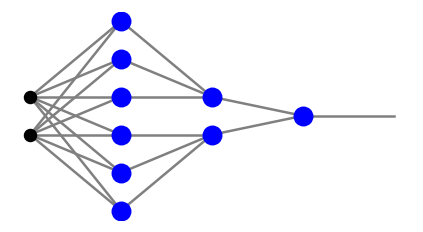

In [5]:
plot_net_tri([2,6,2,1]);

Note that the first and second neuron layers are not fully connected here, as we "stack on top of each other" two networks producing triangles, as in the third panel of {numref}`nfn-fig`. Next, in the third neuron layer (here having a single neuron) we implement a $p \,\wedge \!\sim\!q$ gate, i.e. the conjunction of the conditions that the points belong to one triangle and do not belong to the other one. As we will show shortly, with appropriate weights, the above network may produce a concave region, for example a triangle with a triangular hollow:  

:::{figure-md} tri-fig

<img src="images/tritri.png" width="200px">

Triangle with a tringular hollow.
:::


Generalizing this argument to other shapes, one can show an important theorem:

```{important}
A perceptron with three or more neuron layers (with sufficiently many neurons in intermediate layers) can classify points belonging to **any** region in $n$-dimensional space with $n-1$-dimensional hyperplane boundaries.
```

```{note}
It is worth stressing here that three layers provide full functionality! Adding more layers to a classifier does not increase its capabilities. 
```

## Feeding forward in Python

Before proceeding with an explicit example, we need a Python code for propagation of the signal in a general fully-connected feed-forward network. First, we represent the architecture of a network with $l$ neuron layers as an array of the form 

$$[n_0,n_1,n_2,...,n_l],$$

where $n_0$ in the number of the input nodes, and $n_i$ are the numbers of neurons in layers $i=1,\dots,l$. For instance, the architecture of the network from the fourth panel of {numref}`nfn-fig` is

In [6]:
arch=[2,4,1] 
arch

[2, 4, 1]

In the codes of this course we use the convention of {numref}`MCP2-fig`, namely, the bias is treated uniformly with the remaining signal. However, the bias notes are not included in counting the numbers $n_i$ defined above. In particular, a more detailed view of the fourth panel of {numref}`nfn-fig` is  

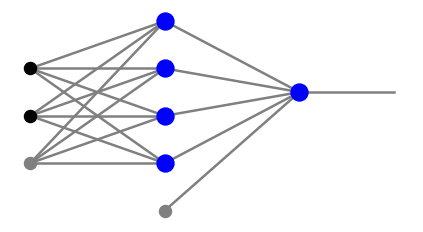

In [7]:
draw.plot_net(arch);

Here, black dots mean input, gray dots indicate the bias nodes carrying input =1, and the blue blobs are the neurons. 

Next, we need the weights of the connections. There are $l$ sets of weights, each one corresponding to the set of edges entering a given neuron layer from the left. 
In the above example, the first neuron layer (blue blobs to the left) has weights which form a $3 \times 4$ matrix. Here 3 is the number of nodes in the preceding (input) layer (including the bias node) and 4 is the number of neurons in the first neuron layer. Similarly, the weights associated with the second (output) neuron layer form a $4 \times 1$ matrix. Hence, in our convention, the weight matrices corresponding to subsequent neuron layers $1, 2, \dots, l$ have dimensions

$$
(n_0+1)\times n_1, \; (n_1+1)\times n_2, \; \dots \; (n_{l-1}+1)\times n_l.
$$

Thus, to store all the weights of a network we actually need **three** indices: one for the layer, one for the number of nodes in the preceding layer, and one for the number of nodes in the given layer. We could have used a three-dimensional array here, but since we number the neuron layers staring from 1, and arrays start numbering from 0, it is somewhat more convenient to use the Python **dictionary** structure. We then store the weights as

$$w=\{1: arr^1, 2: arr^2, ..., l: arr^l\},$$

where $arr^i$ is a **two-dimensional** array (matrix) of weights for the neuron layer $i$. For the case of the above figure we can take, for instance

In [8]:
w={1:np.array([[1,2,1,1],[2,-3,0.2,2],[-3,-3,5,7]]),2:np.array([[1],[0.2],[2],[2],[-0.5]])}

print(w[1])
print("")
print(w[2])

[[ 1.   2.   1.   1. ]
 [ 2.  -3.   0.2  2. ]
 [-3.  -3.   5.   7. ]]

[[ 1. ]
 [ 0.2]
 [ 2. ]
 [ 2. ]
 [-0.5]]


For the signal propagating along the network we also correspondingly use a dictionary of the form 

$$x=\{0: x^0, 1: x^1, 2: x^2, ..., l: x^l\},$$

where $x^0$ is the input, and $x^i$ is the output leaving the neuron layer $i$, with $i=1, \dots, l$. All symbols $x^j$, $j=0, \dots, l$, are one-dimensional arrays. The bias nodes are included, hence the dimensions of $x^j$ are $n_j+1$, except for the output layer which has no bias node, hence $x^l$ has the dimension $n_l$. In other words, the dimensions of the signal arrays are equal to the total number of nodes in each layer.

Next, we present the corresponding formulas in a rather painful detail, as this is key to avoid any possible confusion related to the notation.
We already know from {eq}`eq-f0` that for a single neuron with $n$ inputs its incoming signal is calculated as

$$s = x_0 w_0 + x_1 w_1 + x_2 w_2 + ... + x_n w_n = \sum_{\beta=0}^n x_\beta w_\beta .$$

With more layers (labeled with superscript $i$) and neurons ($n_i$ in layer $i$), 
the notation generalizes into

$$
s^i_\alpha=\sum_{\beta=0}^{n_{i-1}} x^{i-1}_\beta w^i_{\beta \alpha}, \;\; \alpha=1\dots n_i, \;\; i=1,\dots,l.
$$

Note that the summation starts from $\beta=0$ to account for the bias node in the preceding layer $(i-1)$, but $\alpha$ starts from 1, as only neurons (and not the the bias node) in layer $i$ receive the signal (see the figure below). 

In the algebraic matrix notation, we can also write more compactly 
$s^{iT} = x^{(i-1)T} W^i$, with $T$ denoting transposition. Explicitly,


$$
\begin{pmatrix} s^i_1 & s^i_2 & ...& s^i_{n_i} \end{pmatrix} = 
\begin{pmatrix} x^{i-1}_0 & x^{i-1}_1 & ...& x^{i-1}_{n_{i-1}} \end{pmatrix}
\begin{pmatrix} w^i_{01} & w^i_{02} & ...& w^i_{0,n_i} \\ w^i_{11} & w^i_{12} & ...& w^i_{1,n_i} \\ 
 ... & ... & ...& ... \\ w^i_{n_{i-1}1} & w^i_{n_{i-1}2} & ...& w^i_{n_{i-1}n_i} \end{pmatrix}.
$$

As we already know very well, the output from a neuron is obtained by acting on its incoming input with an activation function. Thus we finally have 

$$ 
x^i_\alpha  = f(s^i_\alpha) = f \left (\sum_{\beta=0}^{n_{i-1}} x^{(i-1)}_\beta w^i_{\beta \alpha} \right), \;\; \alpha=1\dots n_i, \;\; i=1,\dots,l , \\
x^i_0 =1, \;\; i=1,\dots,l-1,  
$$

with the bias nodes set to one. 
The figure below illustrates the notation.

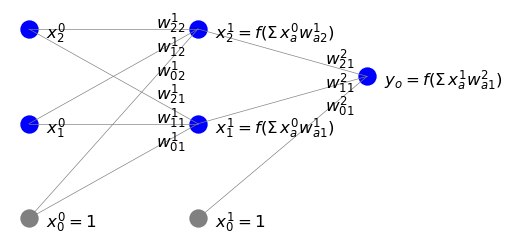

In [9]:
def plot_net_lab(n_war, weights, x):
    """draw network with labels"""
    li_war=len(n_war)
    plt.figure(figsize=(4,2.3),dpi=120) 

    for i in range(li_war): 
        for j in range(1,n_war[i]): 
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            lab=x[i][j]
            plt.text(i+0.1, j-n_war[i]/2-.1, lab, fontsize=10)
    
    for i in range(li_war-1): 
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray')
            lab=x[i][0]
            plt.text(i+0.1, 0-n_war[i]/2-.1, lab, fontsize=10)
   
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray',linewidth=0.4)
                plt.text(i+0.75, 0.25*(j-n_war[i]/2)+0.75*(k+1-n_war[i+1]/2), 
                         weights[i+1][j][k], fontsize=10)

    plt.axis("off")
    plt.show()
    

plot_net_lab([3,3,2],
             {1: [["$w_{01}^{1}$", "$w_{02}^{1}$"], ["$w_{11}^{1}$", "$w_{12}^{1}$"], 
                  ["$w_{21}^{1}$", "$w_{22}^{1}$"]], 
              2: [["$w_{01}^{2}$"], ["$w_{11}^{2}$"], ["$w_{21}^{2}$"]]} ,
             {0: np.array(["$x_0^{0}=1$","$x_1^{0}$","$x_2^{0}$"]), 
              1: np.array(["$x_0^{1}=1$","$x_1^{1}=f(\Sigma \,x_a^{0} w_{a1}^{1})$",
                                           "$x_2^{1}=f(\Sigma \,x_a^{0} w_{a2}^{1})$"]), 
              2: np.array(["","$y_o=f(\Sigma \,x_a^{1} w_{a1}^{2})$"])})

The implementation of the feed-forward propagation explained above in Python is following:

In [32]:
def feed_forward(ar, we, x_in, f=func.step):
    """
    Feed-forward propagation
    
    input: 
    ar - array of numbers of nodes in subsequent layers [n_0, n_1,...,n_l]
    (from input layer 0 to output layer l, bias nodes not counted)
    
    we - dictionary of weights for neuron layers 1, 2,...,l in the format
    {1: array[n_0+1,n_1],...,l: array[n_(l-1)+1,n_l]}
    
    x_in - input vector of length n_0 (bias not included)
    
    f - activation function (default: step)
    
    return: 
    x - dictionary of signals leaving subsequent layers in the format
    {0: array[n_0+1],...,l-1: array[n_(l-1)+1], l: array[nl]}
    (the output layer carries no bias)
    
    """

    l=len(ar)-1                   # number of the neuron layers
    x_in=np.insert(x_in,0,1)      # input, with the bias node inserted
    
    x={}                          # empty dictionary x
    x.update({0: np.array(x_in)}) # add input signal to x
    
    for i in range(1,l):          # loop over layers except the last one
        s=np.dot(x[i-1],we[i])    # signal, matrix multiplication 
        y=[f(s[k]) for k in range(arch[i])] # output from activation
        x.update({i: np.insert(y,0,1)}) # add bias node and update x

                                  # the output layer l - no adding of the bias node
        s=np.dot(x[l-1],we[l])    # signal   
        y=[f(s[q]) for q in range(arch[l])] # output
        x.update({l: y})          # update x
          
    return x

For brevity, we do not pass the input bias node of the input in the argument. It is inserted inside the function.

Next, we test how **feed_forward** works on a sample input. 

In [12]:
xi=[2,-1]
x=func.feed_forward(arch,w,xi,func.step)
print(x)

{0: array([ 1,  2, -1]), 1: array([1, 1, 0, 0, 0]), 2: [1]}


The output from this network is obtained as  

In [40]:
x[2][0]

1

## Visualization

For visualization of simple networks, in the **draw** module of he **neural** library we provide some drawing functions which show the weights, as well as the signals. Function **plot_net_w** draws the positive weights in red and the negative ones in blue, with the widths reflecting their magnitude. The last parameter, here 0.5, rescales  the widths such that the graphics looks nice. Function **plot_net_w_x**  prints in addition the values of the signal leaving the nodes of each layer.

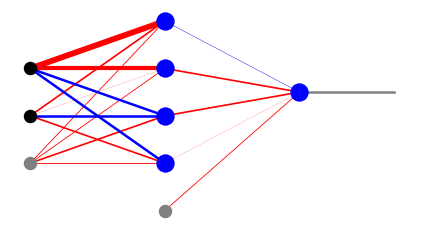

In [13]:
draw.plot_net_w(arch,w,0.5);

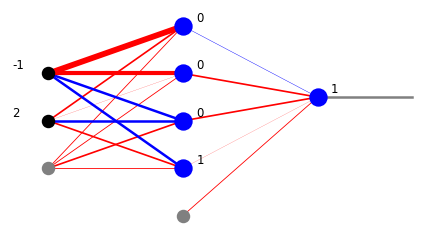

In [14]:
draw.plot_net_w_x(arch,w,0.5,x);

## Classifier with three neuron layers

We are now ready to explicitly construct an example of a binary classifier of points in a concave region: a triagle with a triangular hollow of {numref}`tri-fig`.
The network architecture is

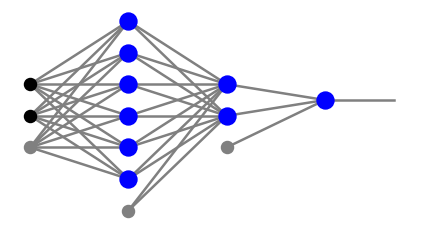

In [15]:
arch=[2,6,2,1]
draw.plot_net(arch);

 The geometric conditions and the corresponding weights for the first neuron layer are

| $\alpha$ | inequality condition | $w_{0\alpha}^1$ | $w_{1\alpha}^1$ | $w_{2\alpha}^1$ |
| --- | --- | --- | --- | --- |
| 1 | $x_1>0.1$ | -0.1 | 1 | 0 |
| 2 | $x_2>0.1$ | -0.1 | 0 | 1 |
| 3 | $x_1+x_2<1$ | 1 | -1 | -1 |
| 4 | $x_1>0.25$ | -0.25 | 1 | 0 |
| 5 | $x_2>0.25$ | -0.25 | 0 | 1 |
| 6 | $x_1+x_2<0.8$ | 0.8 | -1 | -1 |

Conditions 1-3 provide boundaries for the bigger triangle, and 4-6 for the smaller one contained in the bigger one.
In the second neuron layer we need to realize two AND gates for conditions 1-3 and 4-6, respectively, hence we take


| $\alpha$ | $w_{0\alpha}^2$ | $w_{1\alpha}^2$ | $w_{2\alpha}^2$ | $w_{3\alpha}^2$ | $w_{4\alpha}^2$ | $w_{5\alpha}^2$ | $w_{6\alpha}^2$ |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 1| -1 | 0.4 | 0.4 | 0.4 | 0 | 0 | 0 |
| 2| -1 | 0 | 0 | 0 | 0.4 | 0.4 | 0.4 |


Finally, in the output layer we take the $p \wedge \! \sim \! q$  gate, hence

| $\alpha$  | $w_{0\alpha}^3$ | $w_{1\alpha}^3$ | $w_{2\alpha}^3$ |
| --- | --- | --- | ---  |
| 1   | -1  | 1.2 | -0.6 |


Putting all this together, the weight dictionary is

In [17]:
w={1:np.array([[-0.1,-0.1,1,-0.25,-0.25,0.8],[1,0,-1,1,0,-1],[0,1,-1,0,1,-1]]),
   2:np.array([[-1,-1],[0.4,0],[0.4,0],[0.4,0],[0,0.4],[0,0.4],[0,0.4]]),
   3:np.array([[-1],[1.2],[-0.6]])}

Feeding forward a sample input yields

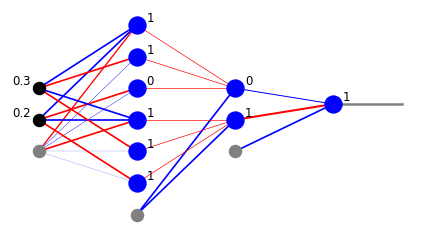

In [18]:
xi=[0.2,0.3]
x=func.feed_forward(arch,w,xi)
draw.plot_net_w_x(arch,w,1,x);


We have just found that point [0.2,0.3] is within our region (1 from the output layer). Actually, we we have more information from the intermediate layers. From the second neuron layer we know that the point belongs to the bigger triangle (1 from the lower neuron) and does not belong to the smaller triangle (0 from the upper neuron). From the first neuron layer we may read out the conditions from the six inequalities.  

Next, we test how our network works for other points. First, we define a function generating a  random point in the square $[0,1]\times [0,1]$ and pass it through the network. We assign to it label 1 if it belongs to the requested triangle with the hollow, and 0 otherwise. Subsequently, we create a large sample of such points and generate the graphics, using pink for label 1 and blue for label 0.

In [19]:
def po():
    xi=[np.random.random(),np.random.random()] # random point from the [0,1]x[0,1] square
    x=func.feed_forward(arch,w,xi)             # feed forward
    return [xi[0],xi[1],x[3][0]]               # the point's coordinates and label

In [20]:
samp=np.array([po() for _ in range(10000)])
print(samp[:5])

[[0.65191479 0.84638747 0.        ]
 [0.05214266 0.76457151 0.        ]
 [0.90977968 0.34320228 0.        ]
 [0.41914537 0.52844105 1.        ]
 [0.8316971  0.19487283 0.        ]]


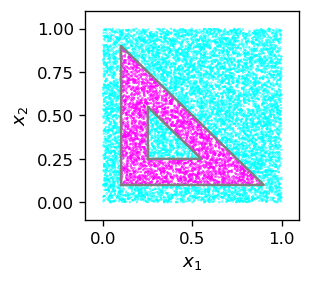

In [21]:
plt.figure(figsize=(2.3,2.3),dpi=120)                 
plt.xlim(-.1,1.1)                                
plt.ylim(-.1,1.1)
plt.scatter(samp[:,0],samp[:,1],c=samp[:,2],       
            s=0.1,cmap=mpl.cm.cool) 

plt.plot([.1,.9,.1,.1],[.1,.1,.9,.1],c='gray')
plt.plot([.25,.55,.25,.25],[.25,.25,.55,.25],c='gray')

plt.xlabel('$x_1$',fontsize=11)                    
plt.ylabel('$x_2$',fontsize=11);

We can see that our little machine works perfectly well!

At this point the reader might again rightly say that the preceding results are trivial: in essence, we have just been implementing some geometric conditions and their conjunctions. 

However, as in the case of single-layer networks, there is an important argument against this apparent triviality. Imagine again we have the data sample with labels, and only this, as in the example of the single MCP neuron of chapter {ref}`MCP-lab`. Then we do not have the dividing conditions to begin with and need some efficient way to find them. This is exactly what teaching of classifiers does: its sets the weights in such a way that the proper conditions are implicitly built in. After the material of this chapter, the reader should be convinced that this is perfectly possible and there is nothing magical about it! 

## Exercises

```{admonition} $~$
:class: warning

- Design a network and run the code from this lecture for a convex region of your choice. 
- Design and program a classifier for four categories of points belonging to regions formed by 2 intersecting lines (hint: include four output cells). 
```